# LLM - Detect AI Generated Text 
# DATA ANALISIS

## Import

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve ,precision_recall_curve,auc

In [3]:
initial_dataset = pd.read_csv("../data/train_essays.csv")
prompts_dataset = pd.read_csv("../data/train_prompts.csv")
custom_data = pd.read_csv("../data/custom_essays.csv")
new_dataset = pd.read_csv("../data/train_v4_drcat_01.csv")

## Handle imbalanced Data


> Because the class distribution is not balanced, most machine learning algorithms will perform
poorly and require modification to avoid simply predicting the majority class in all cases.
Additionally, metrics like classification accuracy lose their meaning and alternate methods for
evaluating predictions on imbalanced examples are required, like ROC area under curve. This is
the foundational challenge of imbalanced classification.
>
> - Jason Brownlee, *Imbalanced Classification with Python* (2020)

> If we think about feature space spatially, we might like all examples in one class to be located on one part
of the space, and those from the other class to appear in another part of the space. [...]
>This is rarely the case, and it is more likely that each class has multiple **concepts** resulting in multiple different groups or clusters of examples in feature space.
>
> - Jason Brownlee, *Imbalanced Classification with Python* (2020)


### Metrics for Imbalanced Data

>Although widely used, classification accuracy is almost universally inappropriate for imbalanced classification. The reason is, a high accuracy (or low error) is achievable by a no skill model that only predicts the majority class. [...]
>
> - Jason Brownlee, *Imbalanced Classification with Python* (2020)

>There are two groups of metrics that may be useful for imbalanced classification because they focus on one class; they are sensitivity-specificity and precision-recall.
>
> - Jason Brownlee, *Imbalanced Classification with Python* (2020)

>One limitation of these metrics is that they assume that the class distribution observed in the training dataset will match the distribution in the test set and in real data when the model is used to make predictions. [...] Ranking metrics don’t make any assumptions about class distributions.
>
> - Jason Brownlee, *Imbalanced Classification with Python* (2020)

>The most commonly used ranking metric is the ROC Curve or ROC Analysis. ROC is an
acronym that means Receiver Operating Characteristic and summarizes a field of study for
analyzing binary classifiers based on their ability to discriminate classes.
>
> - Jason Brownlee, *Imbalanced Classification with Python* (2020)

>Although generally effective, the ROC Curve and ROC AUC can be optimistic under a severe class imbalance, especially when the number of examples in the minority class is small.
An alternative to the ROC Curve is the precision-recall curve that can be used in a similar way, although focuses on the performance of the classifier on the minority class.
>
> - Jason Brownlee, *Imbalanced Classification with Python* (2020)


#### ROC AUC curve

In [15]:
def ROCcurves(model,x_val,y_val):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    
    y_pred = model.predict(x_val).ravel()
    fpr, tpr , _ = roc_curve(y_val,  y_pred)
    auc_ss = auc(fpr,tpr)
    precision, recall, _ = precision_recall_curve(y_val,  y_pred)
    auc_pr = auc(recall, precision)

    # Primer subgráfico
    axs[0].plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='AUC = 0.50')
    axs[0].plot(fpr,tpr, label='ROC curve', color='blue')
    axs[0].set_title(f'ROC curve = {round(auc_ss,3)}')
    axs[0].set_xlabel('FalsePositiveRate')
    axs[0].set_ylabel('TruePositiveRate')
    axs[0].legend()
    # Segundo subgráfico
    axs[1].plot([0, 1], [0,0], color='gray', lw=1, linestyle='--', label='AUC = 0.0')
    axs[1].plot(recall, precision, label='ROC-RP curve', color='orange')
    axs[1].set_title(f'ROC-RP curve = {round(auc_pr,3)}')
    axs[1].set_xlabel('Recall')
    axs[1].set_ylabel('Precision')
    axs[1].legend()
    plt.show()



### Data Sampling for imbalanced data

> Sadly, k-fold cross-validation is not appropriate for evaluating imbalanced classifiers.
[...]
The reason is that the data is split into k-folds with a uniform probability distribution. This might work fine for data with a balanced class distribution, but when the distribution is severely skewed, it is likely that one or more folds will have few or no examples from the minority class.
>
> - Jason Brownlee, *Imbalanced Classification with Python* (2020)

> The solution is to not split the data randomly when using k-fold cross-validation or a train-test
split. [...] For example, we can use a version of k-fold cross-validation that preserves the imbalanced class distribution in each fold. It is called stratified k-fold cross-validation and will enforce the class distribution in each split of the data to match the distribution in the complete training dataset.
>
> - Jason Brownlee, *Imbalanced Classification with Python* (2020)

> Sampling is only performed on the training dataset, the dataset used by an algorithm to
learn a model. It is not performed on the holdout test or validation dataset.
>
> - Jason Brownlee, *Imbalanced Classification with Python* (2020)

- Stratified k-folding CrossValidation
- Random Downsampling
- Adding data as kind of Oversampling

## Initial Dataset analisis

In [4]:
initial_dataset

,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0
...,...,...,...,...
1373,fe6ff9a5,1,There has been a fuss about the Elector Colleg...,0
1374,ff669174,0,Limiting car usage has many advantages. Such a...,0
1375,ffa247e0,0,There's a new trend that has been developing f...,0
1376,ffc237e9,0,As we all know cars are a big part of our soci...,0


In [5]:
initial_dataset.dtypes

id           object
prompt_id     int64
text         object
generated     int64
dtype: object

In [6]:
initial_dataset.shape

(1378, 4)

In [7]:
initial_dataset.describe()

,prompt_id,generated
count,1378.000000,1378.000000
mean,0.486212,0.002177
std,0.499991,0.046625
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,1.000000,1.000000


`generated` - Whether the essay was written by a student (0) or generated by an LLM (1). This field is the target and is not present in test_essays.csv.

In [8]:
initial_dataset.value_counts("generated")

generated
0    1375
1       3
Name: count, dtype: int64

In [9]:
generated = initial_dataset.value_counts("generated")
generated

generated
0    1375
1       3
Name: count, dtype: int64

In [10]:
generated = generated.apply(lambda x : x/initial_dataset.shape[0])
generated

generated
0    0.997823
1    0.002177
Name: count, dtype: float64

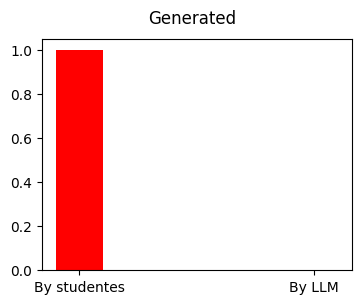

In [11]:
fig, ax = plt.subplots(figsize=(4,3))
fig.suptitle("Generated")
ax.bar(
    x=["By studentes","By LLM"],
    height=generated,
    width=0.2,
    color=["red","green"],
    align="center")
plt.show()

In [12]:
prompts_dataset

,prompt_id,prompt_name,instructions,source_text
0,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ..."
1,1,Does the electoral college work?,Write a letter to your state senator in which ...,# What Is the Electoral College? by the Office...


In [13]:
prompts = initial_dataset.value_counts("prompt_id")
prompts

prompt_id
0    708
1    670
Name: count, dtype: int64

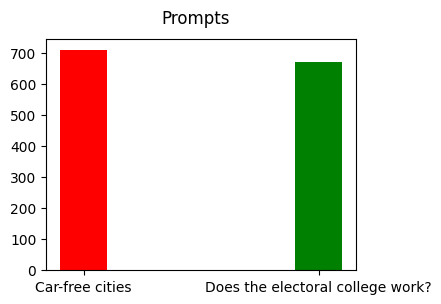

In [14]:
fig, ax = plt.subplots(figsize=(4,3))
fig.suptitle("Prompts")
ax.bar(
    x=["Car-free cities","Does the electoral college work?"],
    height=prompts,
    width=0.2,
    color=["red","green"],
    align="center")
plt.show()

## New Dataset Analisis

In [16]:
new_dataset

,text,label,prompt_name,source,RDizzl3_seven,model
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False,human
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False,human
2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False,human
3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False,human
4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False,human
...,...,...,...,...,...,...
73568,I am writing you today to disagree with your t...,1,Grades for extracurricular activities,persuade_finetuned_llamas,False,llama
73569,"Dear Principal,\n\nIn conclusion, I would obse...",1,Grades for extracurricular activities,persuade_finetuned_llamas,False,llama
73570,"Dear Mrs. Principal,\n\nin these kinds of cons...",1,Grades for extracurricular activities,persuade_finetuned_llamas,False,llama
73571,I enjoyed Form five and excitedly ex claims ed...,1,Grades for extracurricular activities,persuade_finetuned_llamas,False,llama


In [17]:
new_dataset.dtypes

text             object
label             int64
prompt_name      object
source           object
RDizzl3_seven      bool
model            object
dtype: object

In [18]:
new_dataset.shape

(73573, 6)

In [19]:
new_dataset.describe()

,label
count,73573.000000
mean,0.627989
std,0.483345
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


`generated` - Whether the essay was written by a student (0) or generated by an LLM (1). This field is the target and is not present in test_essays.csv.

In [21]:
new_dataset.value_counts("label")

label
1    46203
0    27370
Name: count, dtype: int64

In [23]:
generated = new_dataset.value_counts("label")
generated

label
1    46203
0    27370
Name: count, dtype: int64

In [24]:
generated = generated.apply(lambda x : x/new_dataset.shape[0])
generated

label
1    0.627989
0    0.372011
Name: count, dtype: float64

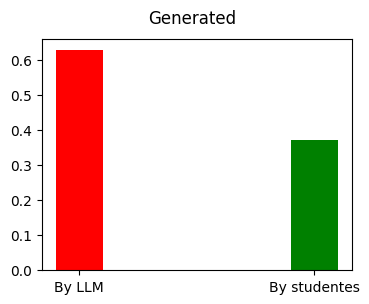

In [48]:
fig, ax = plt.subplots(figsize=(4,3))
fig.suptitle("Generated")
ax.bar(
    x=["By LLM","By studentes"],
    height=generated,
    width=0.2,
    color=["red","green"],
    align="center")
plt.show()

In [26]:
prompts_dataset

,prompt_id,prompt_name,instructions,source_text
0,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ..."
1,1,Does the electoral college work?,Write a letter to your state senator in which ...,# What Is the Electoral College? by the Office...


In [28]:
prompts = new_dataset.value_counts("prompt_name")
prompts

prompt_name
Car-free cities                          8125
Does the electoral college work?         7820
Facial action coding system              6471
Distance learning                        6199
Seeking multiple opinions                5785
Driverless cars                          5664
Exploring Venus                          5572
"A Cowboy Who Rode the Waves"            5286
The Face on Mars                         5277
Mandatory extracurricular activities     3697
Summer projects                          3325
Cell phones at school                    2734
Grades for extracurricular activities    2724
Community service                        2709
Phones and driving                       2185
Name: count, dtype: int64

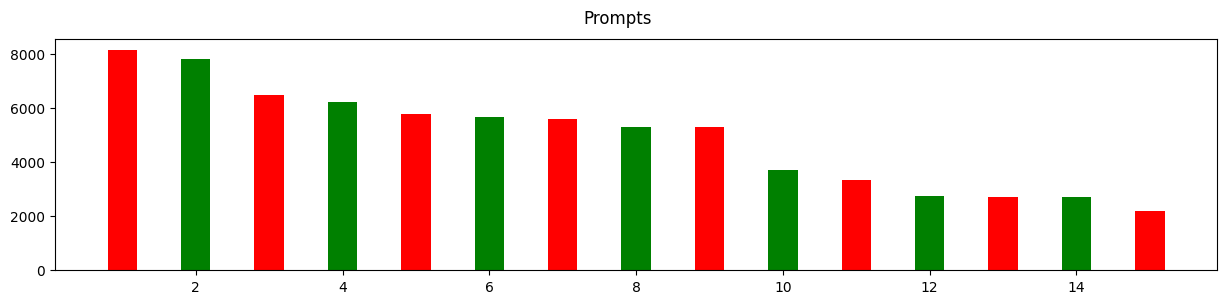

In [50]:
fig, ax = plt.subplots(figsize=(15,3))
fig.suptitle("Prompts")
ax.bar(
    x=[i for i in range(1,len(prompts.keys())+1)],
    height=prompts,
    width=0.4,
    color=["red","green"],
    align="center")
plt.show()

## Train Dataset analisis

In [ ]:
train_dataset= pd.read_csv("../data/lexp/pre_processed/train.csv")

In [ ]:
train_dataset.describe()

NameError: name 'new_dataset' is not defined

>    Euclidean Distance
>
>This metric calculates the straight-line distance between two points in n-dimensional space. It is often  used for continuous numerical data and is easy to understand and implement. However, it can be sensitive > to outliers and does not account for the relative importance of different features.
>
>    Manhattan Distance
>
>This metric calculates the distance between two points by considering the absolute differences of their coordinates in each dimension and summing them. It is less sensitive to outliers than Euclidean distance, but it may not accurately reflect the actual distance between points in some cases.
>
>https://towardsdatascience.com/5-data-similarity-metrics-f358a560855f

In [ ]:
from scipy.spatial.distance import euclidean, cityblock
import numpy as np
n=40
eulist = np.zeros((n, n))
manlist = np.zeros((n, n))
for i,a in enumerate(train_dataset.values[0:n]):
      for j,b in enumerate(train_dataset.values[0:n]):
            # Calculate Euclidean distance
            eulist[i,j]=euclidean(a[3:116], b[3:116])
            
            # Calculate Manhattan distance
            manlist[i,j]=cityblock(a[3:116], b[3:116])
            

/tmp/ipykernel_26916/3191746036.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


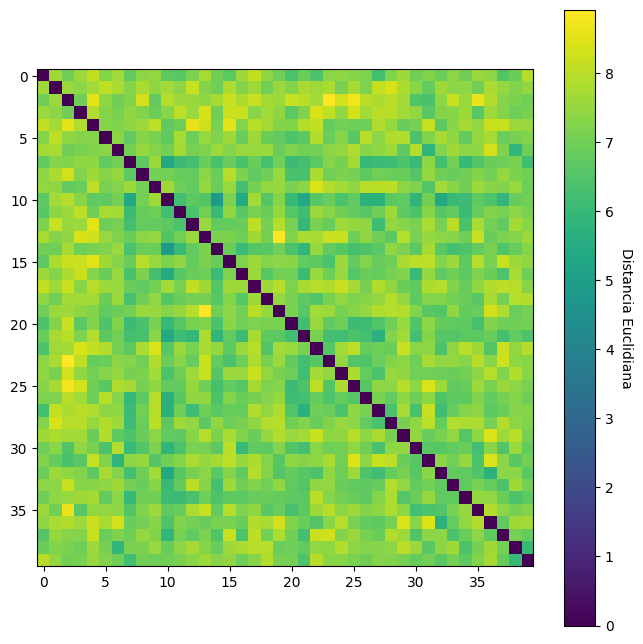

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

im = ax.imshow(manlist, cmap='viridis')

# Añadir barra de color
cbar = ax.figure.colorbar(im, ax=ax)
cbar.set_label('Distancia Euclidiana', rotation=-90, va="bottom")
fig.show()

In [ ]:
correlation_matrix = np.corrcoef(train_dataset, rowvar=False)

TypeError: unsupported operand type(s) for /: 'str' and 'int'